In [ ]:
%%capture
#@title 1. Install libraries

#@markdown ## Execute this cell by pressing the _Play_ button on the left to download and install prerequisites in this Colab notebook.

%load_ext autoreload
%autoreload 2
!git clone https://github.com/bougui505/quicksom_seq
%cd quicksom_seq
!git clone https://github.com/bougui505/quicksom
!pip install biopython
!pip install torch
!pip install functorch
!pip install dill
!pip install jaxlib
!pip install jax
!pip install adjustText

In [ ]:
%%capture
#@title 2. Import libraries

#@markdown ##Import needed libraries
import torch
print(torch.cuda.is_available())
import jax
import Bio
import sys
import os
sys.path.append('analysis')
import som_seq
import plot_umat
import classification
import mutation_pathway
import dmatrix
from quicksom.som import SOM
from IPython.display import Image
import numpy as np
import time
import pandas as pd
import pickle

In [ ]:
#@title 3. Load Multiple Sequence Alignment (MSA)

#@markdown ##Load the MSA from your local file system. The MSA should have a fasta format, with "-" dashes at the the insertion
#@markdown ####If upload is canceled the following cell will use Human Kinome MSA as a test case

from google.colab import files
fl=files.upload();
with open("seq.aln","w") as infile:
    for key in fl:
        text=fl[key].decode()
        infile.write(text)

#with open("seq.aln","r") as seqfile:
#   for line in seqfile.readlines(): print(line)

Saving TssB.fasta to TssB.fasta


In [ ]:
#@title 4. Compute the Self Organizing Map

#@markdown ##Run the cell to compute the SOM
somside = 90
nepochs = 100
alpha = 0.5
sigma= np.sqrt(somside*somside)/4.0
start = time.time()
test_aln = '/content/quicksom_seq/data/Human_kinome/human_kinome_noPLK5.aln'
if np.genfromtxt('seq.aln').size > 0:
  som_seq.main(ali="seq.aln", batch_size=10, use_jax=True,
               outname="som", somside=somside, nepochs=nepochs,
               scheduler="exp", alpha=alpha, sigma= sigma)
else:
  som_seq.main(ali=test_aln, batch_size=10, use_jax=True,
               outname="som", somside=somside, nepochs=nepochs,
               scheduler="exp", alpha=alpha, sigma= sigma)
end = time.time()
print(end - start)

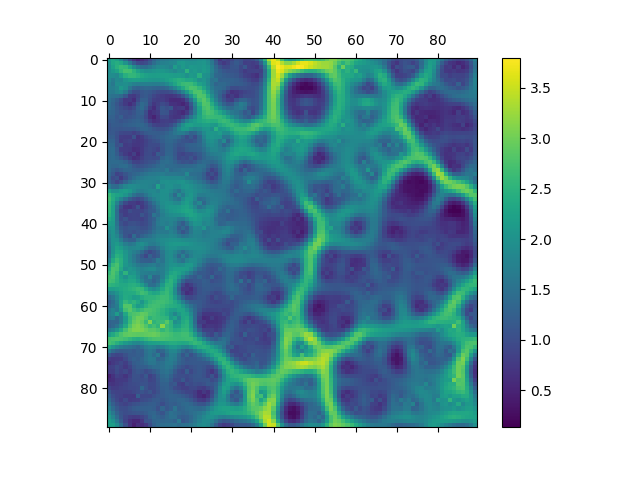

In [ ]:
#@markdown  ## 5.1 UMAT
plot_umat.main('/content/quicksom_seq/som.pickle',hideSeqs=True, outname='umat')
Image('/content/quicksom_seq/umat.png')

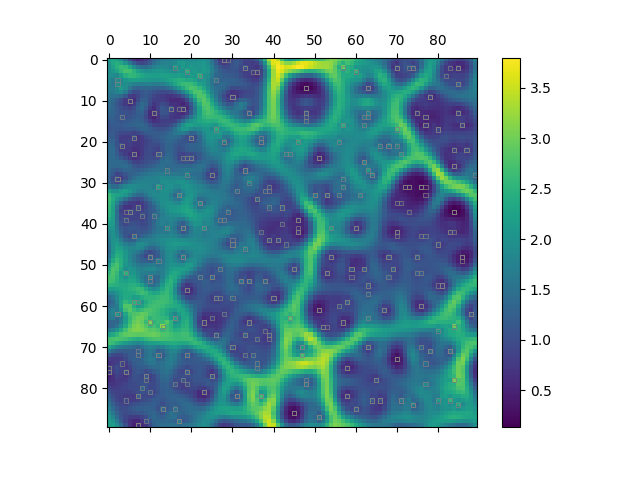

In [ ]:
#@markdown  ## 5.2 UMAT with mapped sequences
plot_umat.main('/content/quicksom_seq/som.pickle',outname='umat_remapped')
Image('/content/quicksom_seq/umat_remapped.png')

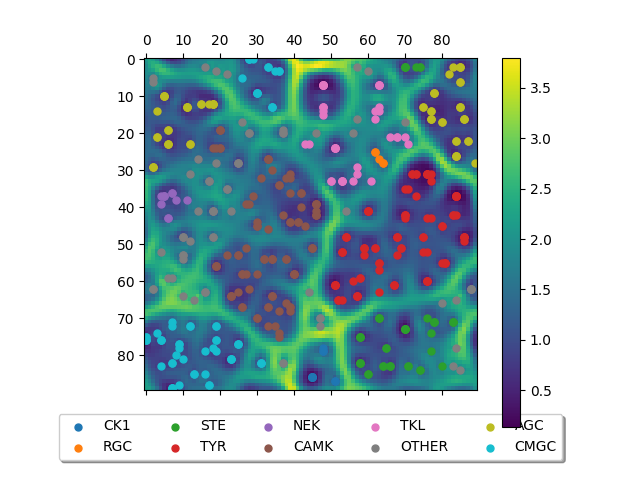

In [ ]:
#@markdown  ## 5.3 UMAT with labeled sequences
plot_umat.main('/content/quicksom_seq/som.pickle',delimiter='_',
               outname='umat_labeled')
Image('/content/quicksom_seq/umat_labeled.png')

computing localadj between queries


100%|██████████| 33411/33411 [07:24<00:00, 75.22it/s]


computing localadj between queries done: 0:07:24.331895
compute the mstree
compute the mstree done: 0:00:00.023382


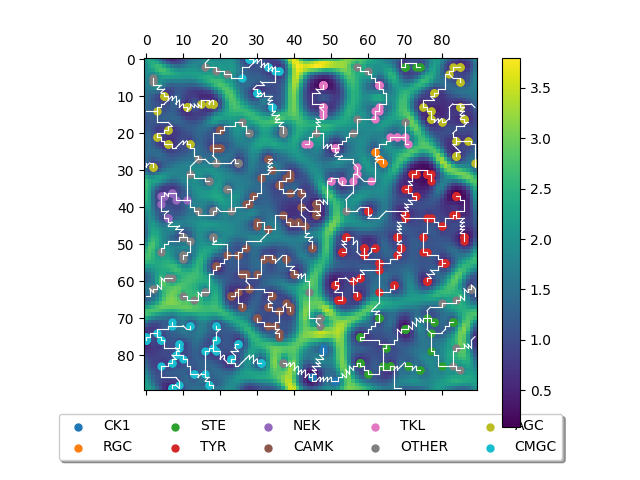

In [ ]:
#@markdown  ## 5.4 UMAT with the minimal spanning tree (MST) between sequences
plot_umat.main('/content/quicksom_seq/som.pickle',delimiter='_',
               outname='umat_minsptree',mst=True)
Image('/content/quicksom_seq/umat_minsptree.png')

compute the umap unfolding
compute the umap unfolding done: 0:00:01.283992
0:00:00.000779


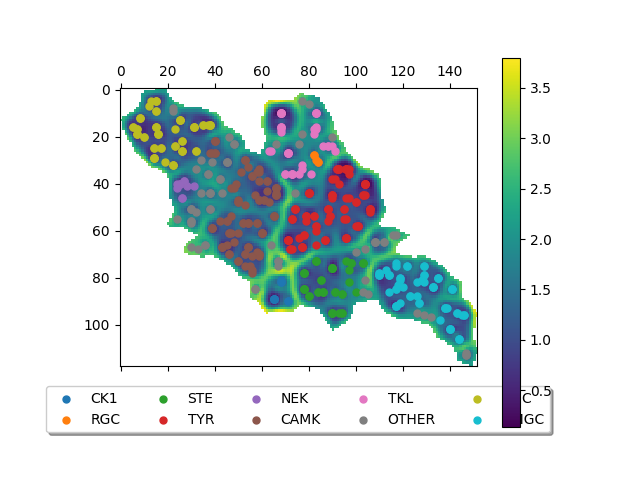

In [ ]:
#@markdown  ## 5.5 Unfolded UMAT
plot_umat.main('/content/quicksom_seq/som.pickle',delimiter='_',
               outname='umat_unfold',unfold=True)
Image('/content/quicksom_seq/umat_unfold.png')

compute the umap unfolding
compute the umap unfolding done: 0:00:01.282538
get the minsptree paths in the unfold umat
get the minsptree paths in the unfold umat done: 0:00:30.708831
0:00:00.000001
42.48540115356445


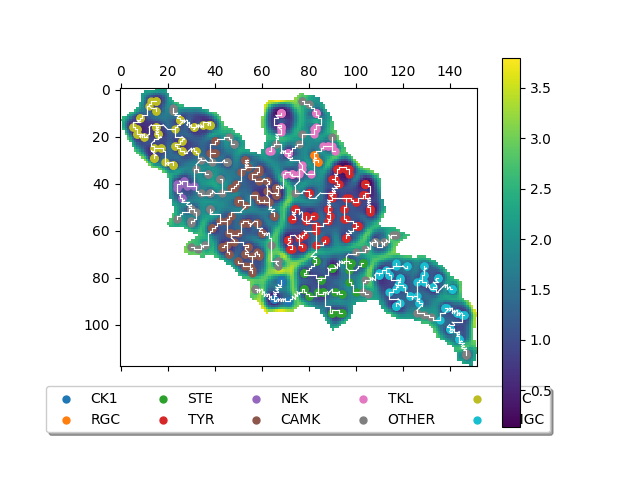

In [ ]:
#@markdown  ## 5.6 Unfolded UMAT with MST
start = time.time()
plot_umat.main('/content/quicksom_seq/som.pickle',delimiter='_',
               outname='umat_minsptree_unfold', mst=True, unfold=True)
end = time.time()
print(end - start)
Image('/content/quicksom_seq/umat_minsptree_unfold.png')

clusterizing the umat


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


clusterizing the umat done: 0:00:34.996727


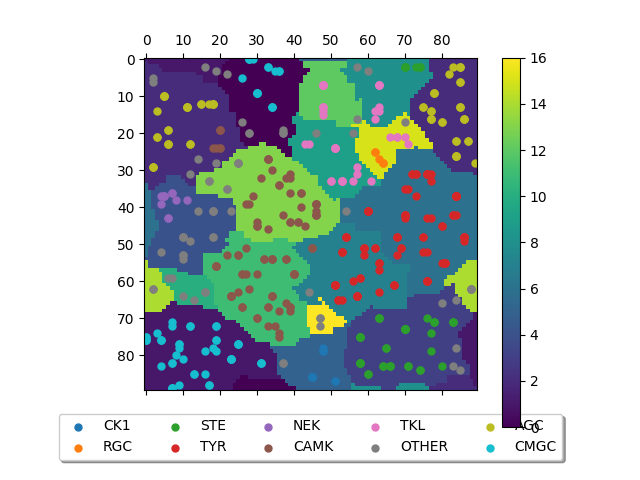

In [ ]:
#@markdown  ## 5.7 Clustered UMAT
plot_umat.main('/content/quicksom_seq/som.pickle',delimiter='_',
               outname='umat_clst', clst=True)
Image('/content/quicksom_seq/umat_clst.png')

clusterizing the umat


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


clusterizing the umat done: 0:00:35.042526


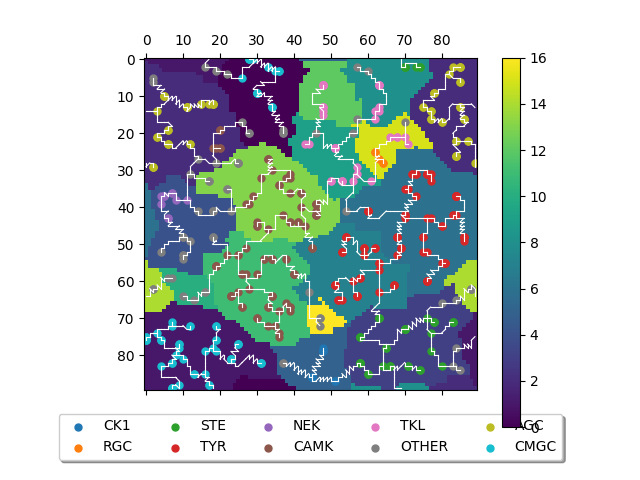

In [ ]:
#@markdown  ## 5.8 Clustered UMAT with MST
plot_umat.main('/content/quicksom_seq/som.pickle',outname='umat_minsptree_clst',delimiter='_',
               hideSeqs=False,mst=True,clst=True,unfold=False)
Image('/content/quicksom_seq/umat_minsptree_clst.png')

compute the umap unfolding
compute the umap unfolding done: 0:00:01.265505
0:00:00.002136
clusterizing the umat


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


clusterizing the umat done: 0:00:33.536931


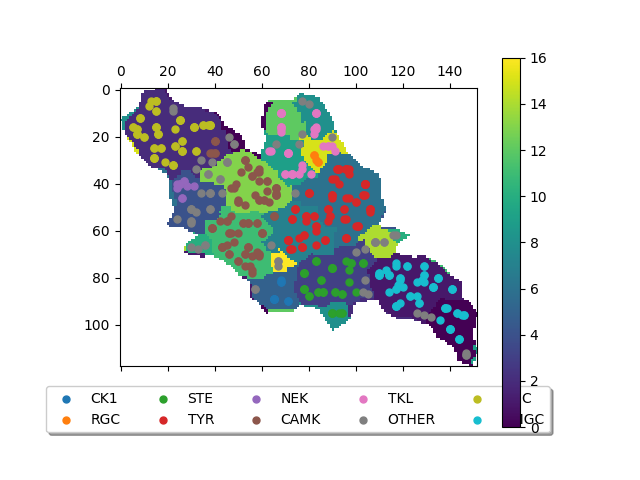

In [ ]:
#@markdown  ## 5.9 Clustered and unfolded UMAT
plot_umat.main('/content/quicksom_seq/som.pickle',outname='umat_unfold_clst',delimiter='_',
               hideSeqs=False,mst=False,clst=True,unfold=True)
Image('/content/quicksom_seq/umat_unfold_clst.png')

compute the umap unfolding
compute the umap unfolding done: 0:00:01.705097
get the minsptree paths in the unfold umat
get the minsptree paths in the unfold umat done: 0:00:30.788698
0:00:00.000002
clusterizing the umat


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


clusterizing the umat done: 0:00:34.222308


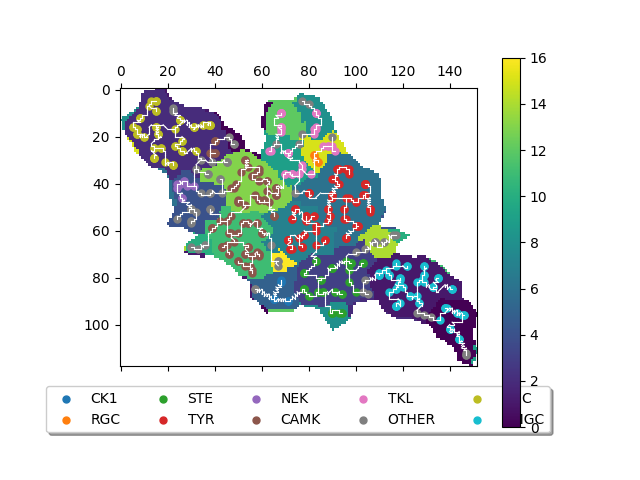

In [ ]:
#@markdown  ## 5.10 Clustered and unfolded UMAT with MST
plot_umat.main('/content/quicksom_seq/som.pickle',outname='umat_minsptree_unfold_clst',
               delimiter='_',hideSeqs=False,mst=True,clst=True,unfold=True)
Image('/content/quicksom_seq/umat_minsptree_unfold_clst.png')

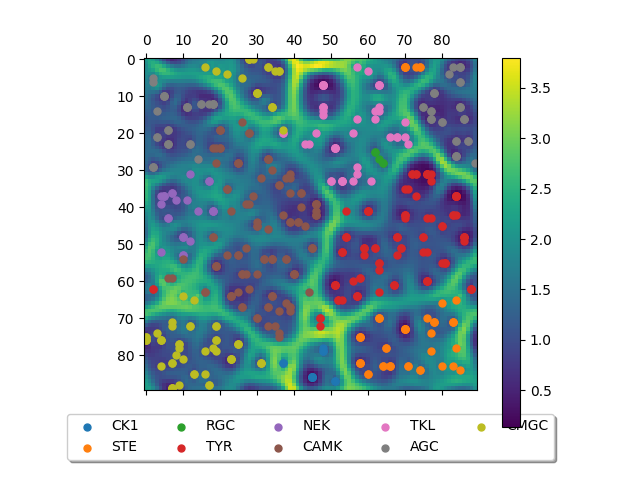

In [ ]:
#@markdown  ## 6. Classification of unclassified sequences ('OTHER')
classification.main(somfile='/content/quicksom_seq/som.pickle', outname='classification',
                    delimiter='_', uclass='OTHER', k=1, plot_ext='png')
Image('/content/quicksom_seq/classification.png')

In [ ]:
df = pd.read_csv('/content/quicksom_seq/classification.csv')
df

,AAK1,NEK
0,BMP2K,NEK
1,BUB1,CK1
2,BUB1B,CK1
3,CDC7,CMGC
4,CHUK,NEK
...,...,...
60,WEE2,NEK
61,WNK1,TYR
62,WNK2,TYR
63,WNK3,TYR


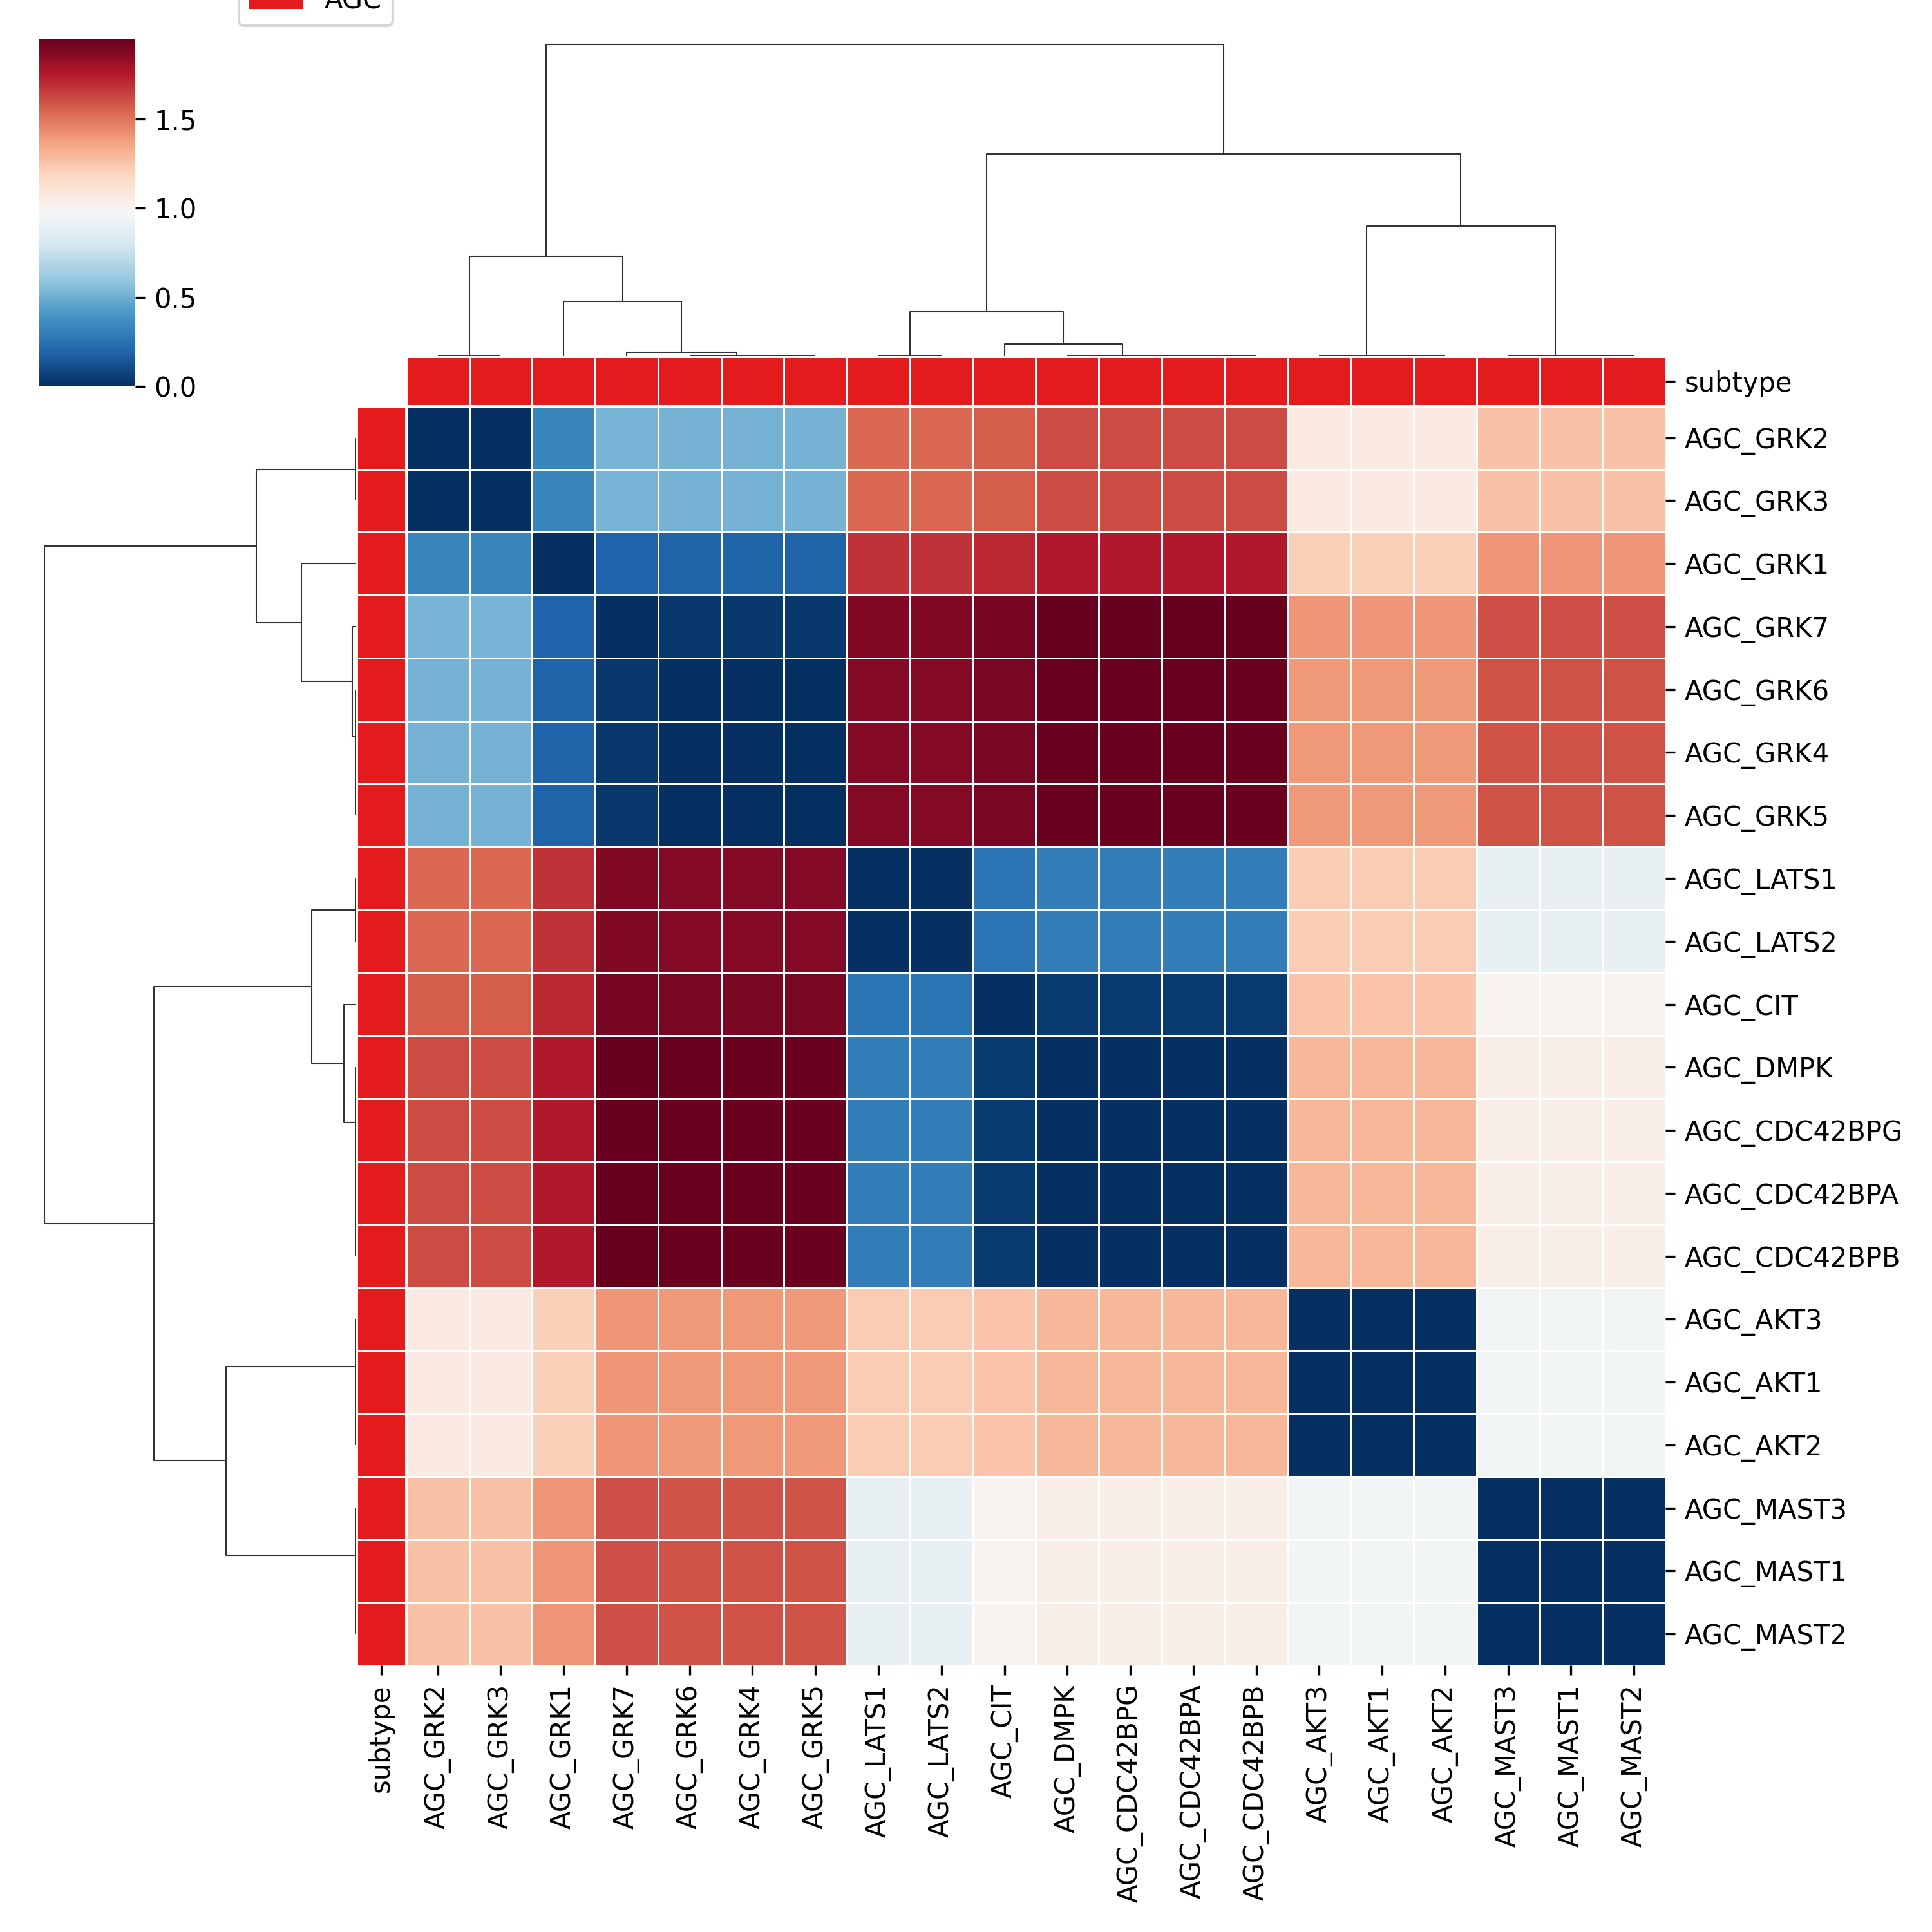

In [ ]:
#@markdown  ## 7. Distance Matrix calculation
with open('/content/quicksom_seq/som.pickle', 'rb') as somfileaux:
  somobj=pickle.load(somfileaux)
dmobj=dmatrix.Dmatrix(somfile='/content/quicksom_seq/som.pickle',
                      querieslist=somobj.labels[0:20],output='dmatrix',delimiter='_')
Image('/content/quicksom_seq/dmatrix.png',width=500,height=500)

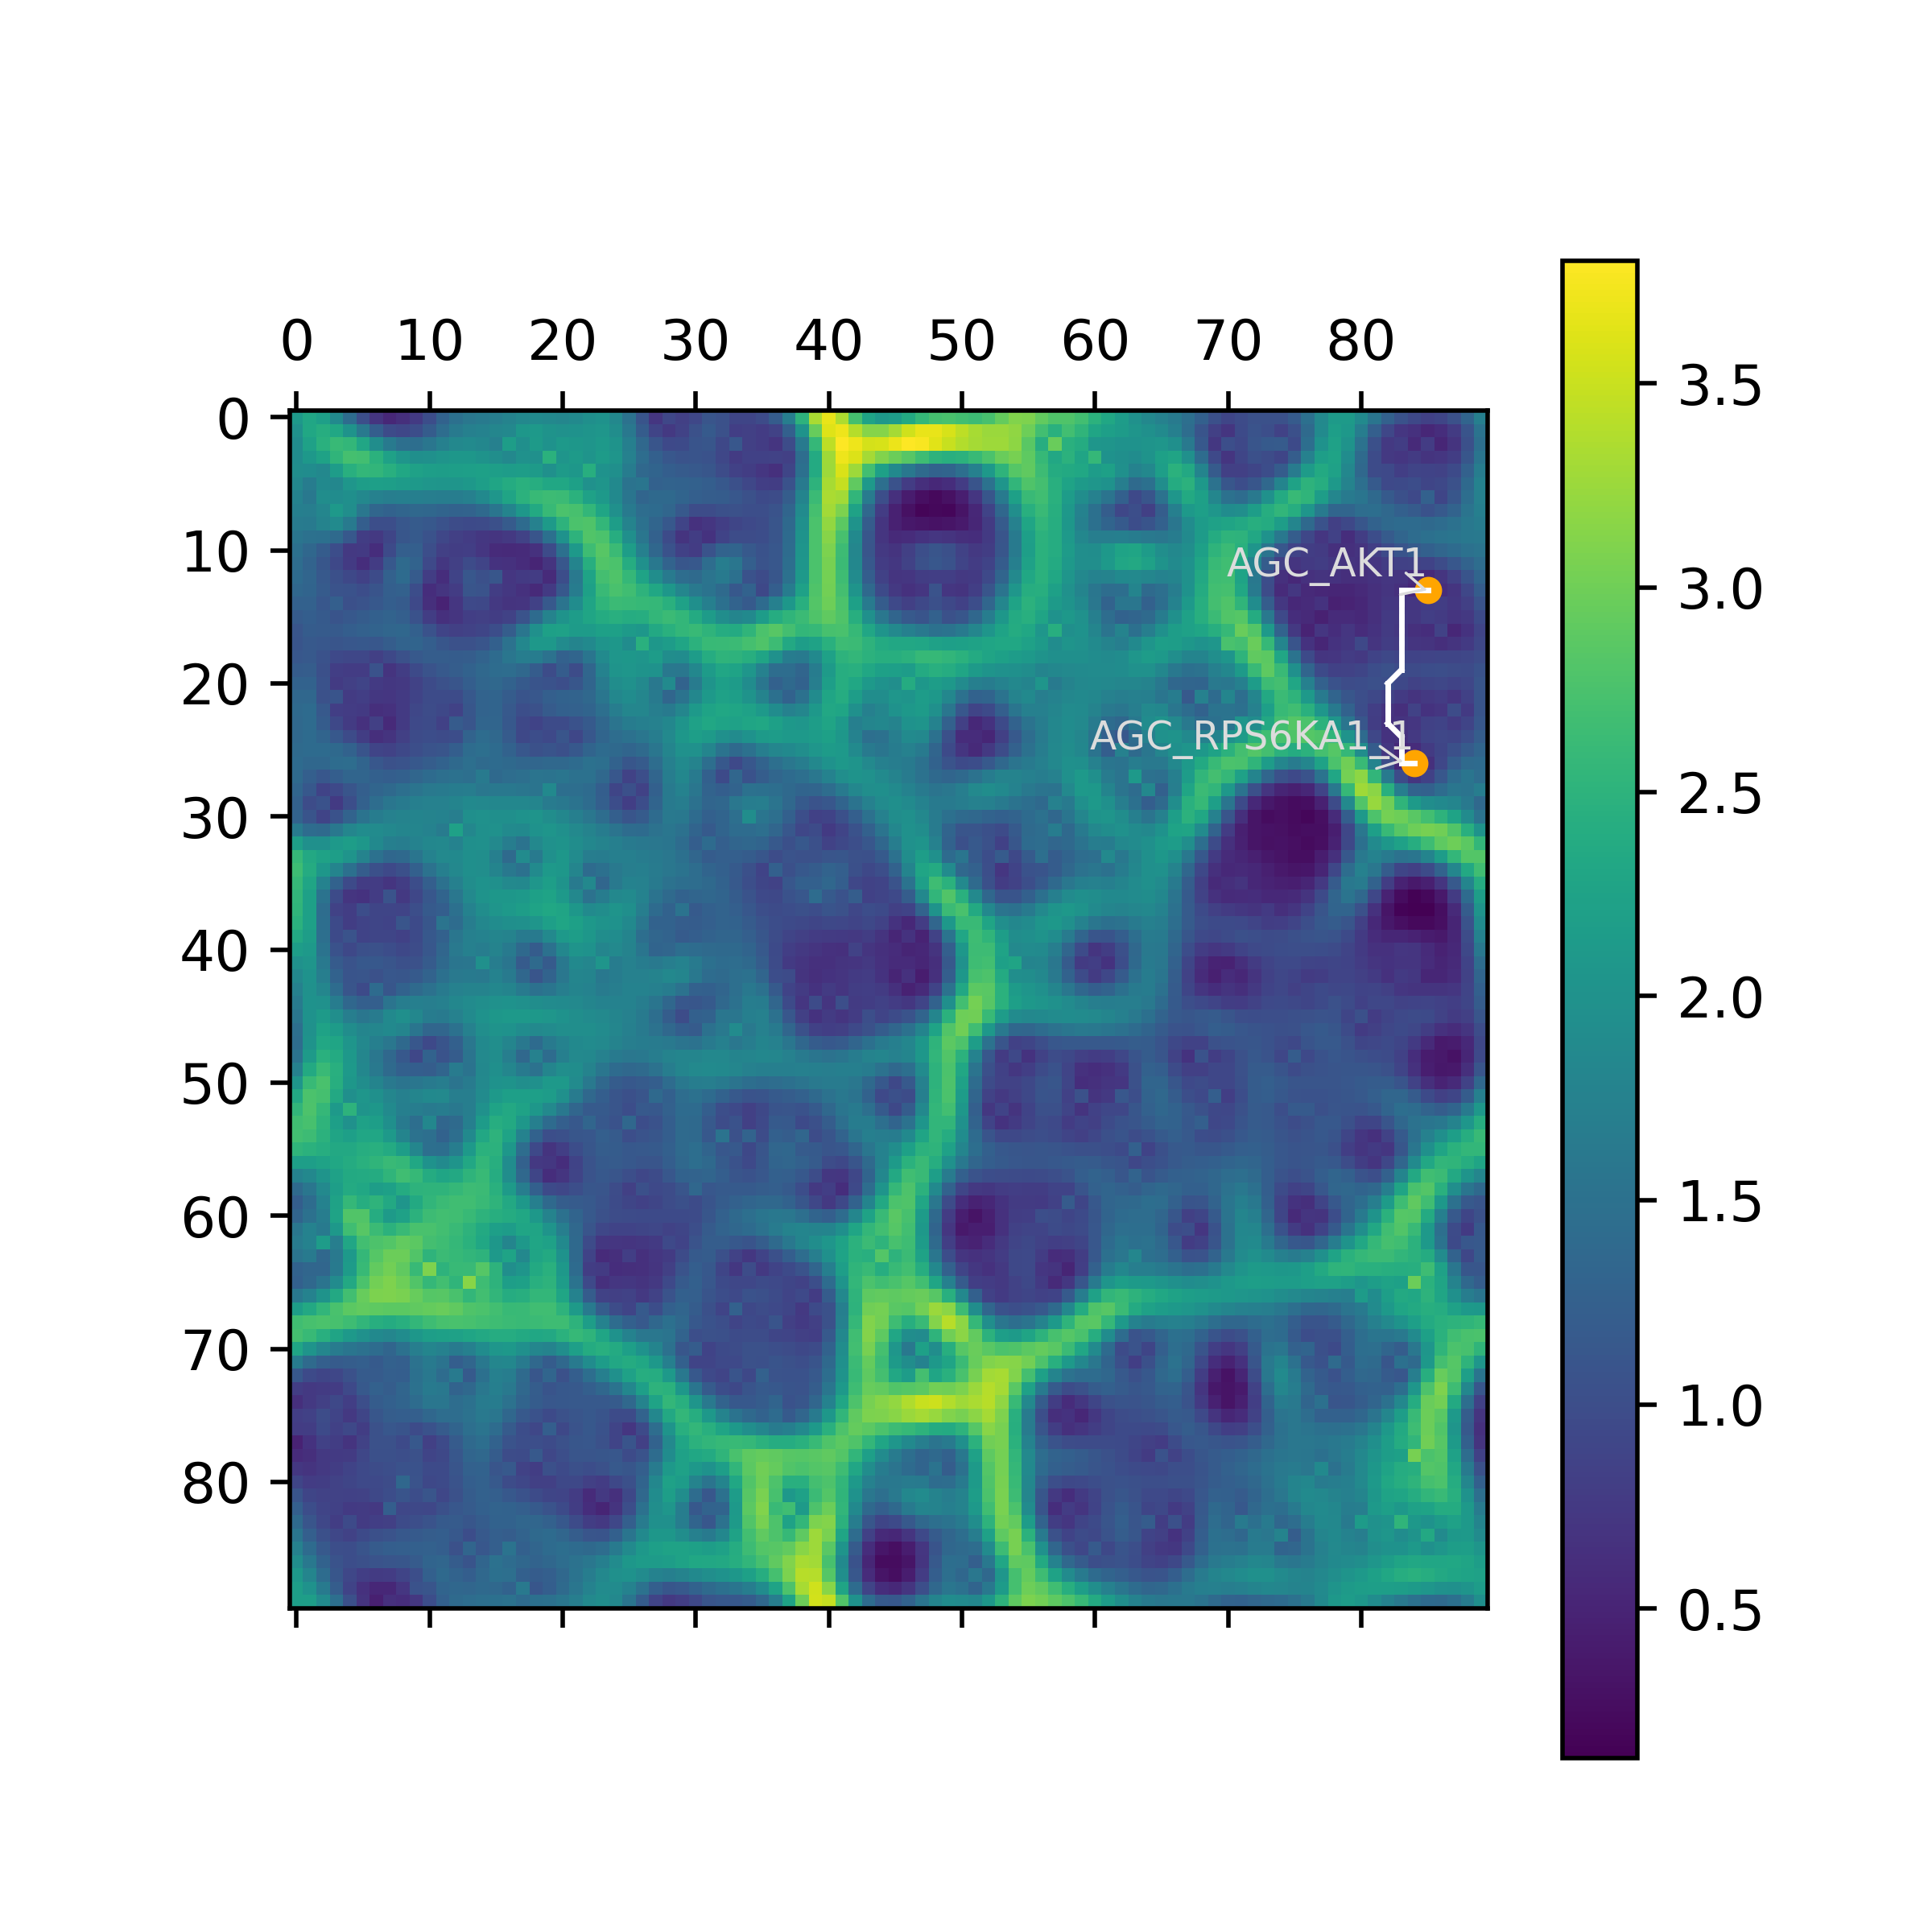

In [ ]:
#@markdown  ## 8. Mutation Pathway
mutation_pathway.main(unit1=somobj.bmus[0],unit2=somobj.bmus[45],
                      somfile='/content/quicksom_seq/som.pickle',
                      outname='mutation_pathway',verbose=False)
Image('/content/quicksom_seq/mutation_pathway.png',width=500,height=500)

In [ ]:
with open("mutation_pathway.fasta","r") as seqfile:
   for line in seqfile.readlines(): print(line)

>[26|84] AGC_RPS6KA1_1

FELL--KVLGQGSFGKVFLVRKVTGSD--AGQLYAMKVLKKATLKVRD----RVRTKMERDILAEV-----NHPFIVKLHYAFQTEG------KLYLILDFLRGGDLFTRLSKEV----------------MFTEEDVKFYLAELALALDHLHSL--GIIYRDLKPENILLDE--------EGHIKLTDFGLSKESIDHEKKA-----------YSFCGTVEYMAPEVVNR------RGHT-QSADWWSFGVLMFEMLTG-SLPFQG-------KDRKETMTLILKAKLGMPQFLS--------------------------------------PEAQSLLRMLFKRNPANRLGAGPDGVEEIKRHPFF

>[26|83]

FELL--KVLGQGSFGKVFLVRKVTGSD--AGQLYAMKVLKKATLKVRD----RVRTKMERDILAEV-----NHPFIVKLHYAFQTEG------KLYLILDFLRGGDLFTRLSKEV----------------MFTEEDVKFYLAELALALDHLHSL--GIIYRDLKPENILLDE--------EGHIKLTDFGLSKESIDHEKKA-----------YSFCGTVEYMAPEVVNR------RGHT-QSADWWSYGVLMFEMLTG-SLPFQG-------KDRKETMTLILKAKLGMPQFLS--------------------------------------PEAQSLLRMLFKRNPANRLGAGPDGVEEIKRHPFF

>[25|83]

FELL--KVLGQGSFGKVFLVRKVTGSD--AGQLYAMKVLKKATLKVRD----RVRTKMERDILAEV-----NHPFIVKLHYAFQTEG------KLYLILDFLRGGDLFTRLSKEV----------------MFTEEDVKFYLAELALALDHLHSL--GIIYRDLKPENILLDE--------EGHIKLTDFGLSKESIDHEKKA-----------

In [ ]:
#@markdown ##Download everything locally to a .tar.gz
from google.colab import files
!tar -zcvf somseq_analysis.tar.gz *.png *.csv *.fasta
files.download('somseq_analysis.tar.gz')
!tar -zcvf somseq.tar.gz som.log som_bmus.txt som_umat.npy som.pickle
files.download('somseq.tar.gz')